**Run the following two cells before you begin.**

In [1]:
%autosave 100

Autosaving every 100 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [3]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [6]:
grid={'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
grid_search=GridSearchCV(estimator=rf,param_grid=grid,verbose=2)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [9]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=10, total=   0.3s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.3s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.3s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.3s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.3s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   1.5s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   2.4s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   2.2s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] .

[CV] .................... max_depth=9, n_estimators=200, total=   9.8s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   0.8s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   0.7s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   0.8s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   0.8s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   0.7s
[CV] max_depth=12, n_estimators=50 ...................................
[CV] .................... max_depth=12, n_estimators=50, total=   3.9s
[CV] max_depth=12, n_estimators=50 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  6.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                    

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [10]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.308169,0.011167,0.011501,0.006652,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.814390,0.819269,0.816925,0.824426,0.815284,0.818058,0.003590,11
1,1.995984,0.300266,0.081898,0.037171,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.812046,0.815284,0.814346,0.820206,0.813408,0.815058,0.002788,15
2,3.691557,0.141660,0.097079,0.010493,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.810640,0.812705,0.813408,0.820441,0.810830,0.813605,0.003580,16
3,7.439637,1.331746,0.189395,0.051846,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.811577,0.815518,0.814346,0.821378,0.813408,0.815246,0.003326,14
4,0.496698,0.038227,0.012386,0.005603,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.814390,0.818565,0.819972,0.826301,0.819503,0.819746,0.003825,10
5,2.899903,0.316775,0.054711,0.010594,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.815561,0.819034,0.819737,0.826067,0.820206,0.820121,0.003390,8
6,4.921972,0.590931,0.079895,0.028591,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.815796,0.819972,0.819503,0.827004,0.820206,0.820496,0.003628,3
7,10.643579,1.777042,0.203178,0.070642,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.815796,0.819972,0.819269,0.826770,0.820675,0.820496,0.003557,3
8,0.729387,0.032766,0.013859,0.004260,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.809702,0.815987,0.819972,0.824895,0.816221,0.817355,0.005008,12
9,2.651019,0.181928,0.048108,0.010256,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.815796,0.818565,0.819503,0.826301,0.819972,0.820027,0.003455,9


**Find the best hyperparameters from the cross-validation.**

In [11]:
grid_search.best_params_

{'max_depth': 12, 'n_estimators': 200}

In [12]:
grid_search.cv_results_['mean_test_score'].reshape(4,4)

array([[0.8180584 , 0.81505804, 0.81360475, 0.81524559],
       [0.81974616, 0.82012116, 0.82049621, 0.82049621],
       [0.81735538, 0.82002739, 0.82026178, 0.82054312],
       [0.81721443, 0.82049614, 0.82049621, 0.82077745]])

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [48]:
x

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [51]:
#x = np.linspace(0,5,num=5)
#y = np.linspace(0,5,num=5)
#[X,Y] = np.meshgrid(x,y)
#print(X)
#print(Y)
#print(X.shape)
#print(Y.shape)

In [52]:
#Create a 5x5 grid
x, y = np.meshgrid(range(5), range(5))
print(x)
print(y)
print(x.shape)
print(y.shape)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
(5, 5)
(5, 5)


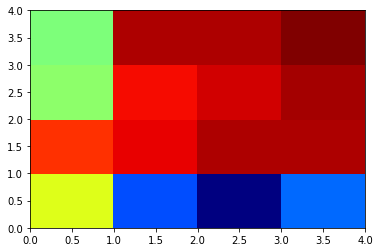

In [53]:
# Set color map to `plt.cm.jet`
ax=plt.axes()
pcolor=ax.pcolormesh(x,y,grid_search.cv_results_['mean_test_score'].reshape(4,4),cmap=plt.cm.jet)

Text(0, 0.5, 'Y coordinate')

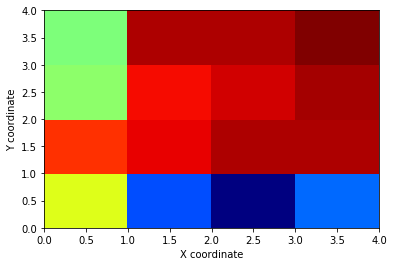

In [54]:
# Visualize pcolormesh
ax=plt.axes()
pcolor=ax.pcolormesh(x,y,grid_search.cv_results_['mean_test_score'].reshape(4,4),cmap=plt.cm.jet)
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [55]:
pre=rf.fit(X_train,y_train).predict(X_test)

In [56]:
features_response.remove('default payment next month')

In [57]:
# Create a dataframe of the feature names and importance
a=pd.DataFrame(data=rf.feature_importances_,index=features_response,columns=['importance'])

In [58]:
# Sort values by importance
a.sort_values('importance')

,importance
MARRIAGE,0.000000
AGE,0.000000
BILL_AMT2,0.000000
BILL_AMT6,0.004252
EDUCATION,0.004554
PAY_AMT5,0.006204
BILL_AMT3,0.007081
BILL_AMT4,0.011928
BILL_AMT1,0.011970
BILL_AMT5,0.018568
